# My try answer my question 

## lets see the data 

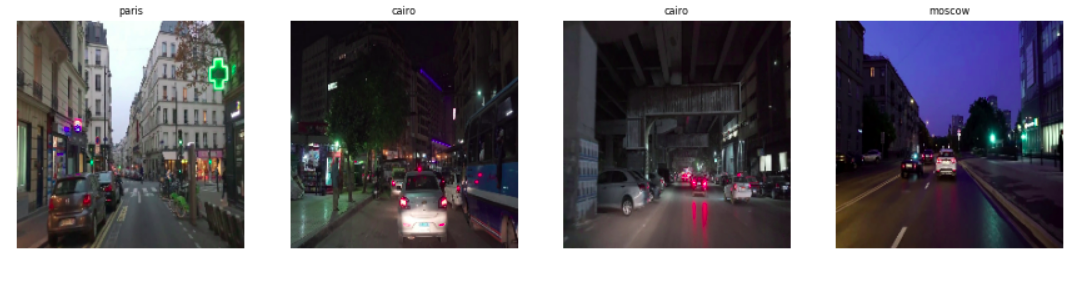


Some streets of Paris, Cairo and Moscow are just trying to build CNN. Explain it

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from glob import glob

In [3]:
training_dir = '../input/where-am-i/Data/train'
testing_dir = '../input/where-am-i/Data/test'
validation_dir = '../input/where-am-i/Data/Val'

In [4]:
BATCH_SIZE = 64
IMAGE_SIZE = 200
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    training_dir,
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE,
)
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    testing_dir,
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE ,
)
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE ,
  
)

Found 1800 files belonging to 3 classes.


2022-03-08 09:44:23.006984: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-08 09:44:23.147851: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-08 09:44:23.148981: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-03-08 09:44:23.152121: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

Found 600 files belonging to 3 classes.
Found 300 files belonging to 3 classes.


In [5]:
class_names = train_dataset.class_names
class_names

['cairo', 'moscow', 'paris']

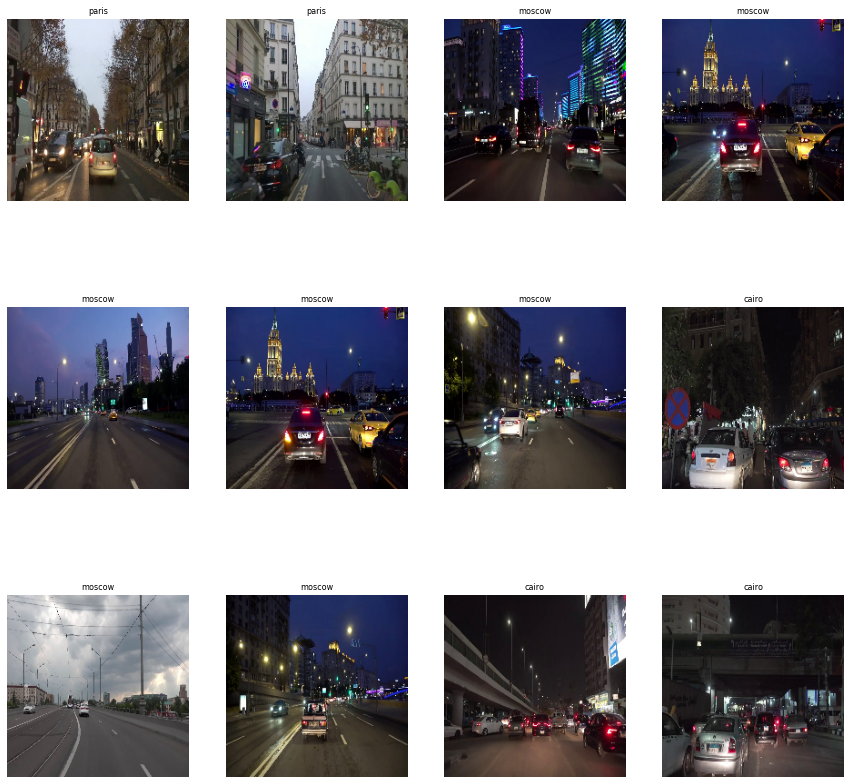

In [38]:
 plt.figure(figsize = (15,15))
 for image_batch, label_batch in train_dataset.take(1):
   for i in range(12):
     ax = plt.subplot(3,4,i+1)
     plt.imshow(image_batch[i].numpy().astype("uint8"))
     plt.title(class_names[label_batch[i]],fontsize = 8)
     plt.axis("off")
  #  print(image_batch.shape[0].shape)

In [7]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.models import Model
import tensorflow.keras as keras

resnet = ResNet50(include_top=False, weights='imagenet', input_shape=(IMAGE_SIZE,IMAGE_SIZE,3),pooling='max')

output = resnet.layers[-1].output
output = tf.keras.layers.Flatten()(output)
resnet = Model(resnet.input, output)

res_name = []
for layer in resnet.layers:
    res_name.append(layer.name)

94781440/94765736 [==============================] - 1s 0us/step


In [8]:
res_name[-22:]

['conv5_block2_1_conv',
 'conv5_block2_1_bn',
 'conv5_block2_1_relu',
 'conv5_block2_2_conv',
 'conv5_block2_2_bn',
 'conv5_block2_2_relu',
 'conv5_block2_3_conv',
 'conv5_block2_3_bn',
 'conv5_block2_add',
 'conv5_block2_out',
 'conv5_block3_1_conv',
 'conv5_block3_1_bn',
 'conv5_block3_1_relu',
 'conv5_block3_2_conv',
 'conv5_block3_2_bn',
 'conv5_block3_2_relu',
 'conv5_block3_3_conv',
 'conv5_block3_3_bn',
 'conv5_block3_add',
 'conv5_block3_out',
 'max_pool',
 'flatten']

In [9]:
set_trainable = False
for layer in resnet.layers:
    if layer.name in res_name[-22:]:
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [10]:
resnet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 200, 200, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 206, 206, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 100, 100, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 100, 100, 64) 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [11]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout



model6 = Sequential()
model6.add(resnet)
model6.add(Dense(2048, activation='relu'))
model6.add(Dense(1024, activation='relu'))
model6.add(Dense(512, activation='relu'))
# model6.add(Dense(256, activation='relu'))
model6.add(Dense(128, activation='relu'))

model6.add(Dense(3, activation='softmax'))


model6.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model (Functional)           (None, 2048)              23587712  
_________________________________________________________________
dense (Dense)                (None, 2048)              4196352   
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              2098176   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               65664     
_________________________________________________________________
dense_4 (Dense)              (None, 3)                 387       
Total params: 30,473,091
Trainable params: 15,816,707
Non-trainable params: 14,656,384
___________________________________

In [12]:
model6.compile(optimizer = 'adam', 
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False), 
              metrics=['accuracy'])


In [13]:

EPOCHS = 10
history6 = model6.fit(
    train_dataset,
    epochs = EPOCHS,
    batch_size = BATCH_SIZE,
    validation_data = val_dataset,
    verbose = 1,
) 

Epoch 1/10


2022-03-08 09:44:43.364413: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


29/29 [==============================] - 28s 523ms/step - loss: 5.6620 - accuracy: 0.7839 - val_loss: 0.8260 - val_accuracy: 0.9800
Epoch 2/10
29/29 [==============================] - 13s 353ms/step - loss: 0.0082 - accuracy: 0.9989 - val_loss: 1.0996 - val_accuracy: 0.9600
Epoch 3/10
29/29 [==============================] - 13s 367ms/step - loss: 0.0109 - accuracy: 0.9967 - val_loss: 2.0526 - val_accuracy: 0.8767
Epoch 4/10
29/29 [==============================] - 13s 355ms/step - loss: 9.7333e-04 - accuracy: 0.9994 - val_loss: 0.0287 - val_accuracy: 0.9967
Epoch 5/10
29/29 [==============================] - 13s 364ms/step - loss: 2.0579e-05 - accuracy: 1.0000 - val_loss: 0.0276 - val_accuracy: 0.9967
Epoch 6/10
29/29 [==============================] - 13s 354ms/step - loss: 1.7603e-06 - accuracy: 1.0000 - val_loss: 0.0233 - val_accuracy: 0.9967
Epoch 7/10
29/29 [==============================] - 13s 340ms/step - loss: 3.0066e-06 - accuracy: 1.0000 - val_loss: 0.0230 - val_accuracy: 0

In [14]:
scores = model6.evaluate(test_dataset)


10/10 [==============================] - 5s 128ms/step - loss: 0.1506 - accuracy: 0.9683


In [15]:
acc = history6.history['accuracy']
val_acc = history6.history['val_accuracy']

loss = history6.history['loss']
val_loss = history6.history['val_loss']

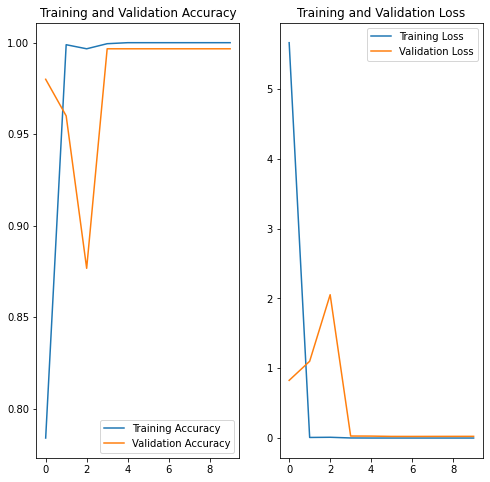

In [16]:



plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

first image to predict
actual label: paris
predicted label: cairo


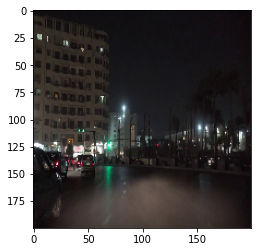

In [17]:
for images_batch, labels_batch in test_dataset.take(1):
    
    first_image = images_batch[23].numpy().astype('uint8')
    first_label = labels_batch[25].numpy()
    
    print("first image to predict")
    plt.imshow(first_image)
    print("actual label:",class_names[first_label])
    
    batch_prediction = model6.predict(images_batch)
    print("predicted label:",class_names[np.argmax(batch_prediction[23])])

In [18]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

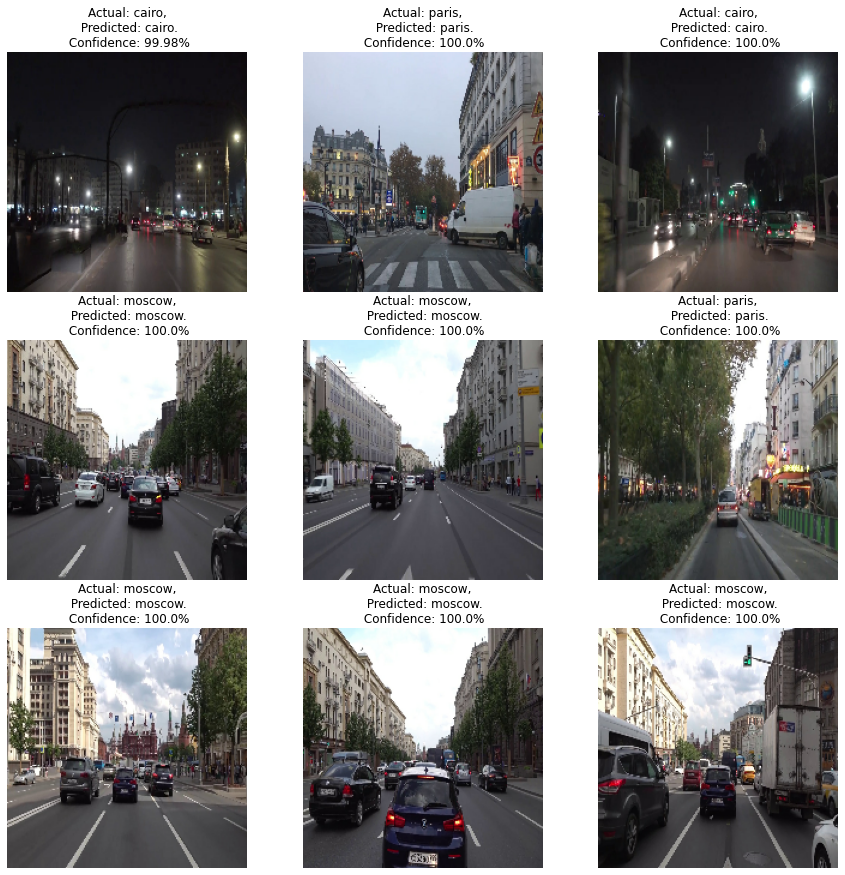

In [21]:
plt.figure(figsize=(15, 15))
for images, labels in test_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, confidence = predict(model6, images[i].numpy())
        actual_class = class_names[labels[i]] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")

## Evaluate in another way

In [22]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [25]:
arr=plt.imread('../input/not-imp/mos.jpg',0)
n = tf.image.resize(arr, (200,200))
img_array = tf.keras.preprocessing.image.img_to_array(n.numpy())
img_array = tf.expand_dims(img_array, 0)


Type of skin disease is moscow
والله يبشا متاكد بالنسبة  98.88


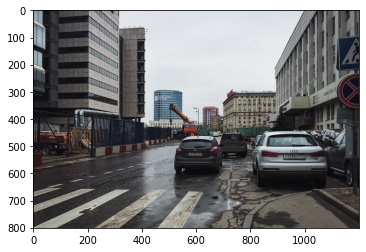

In [29]:
model6.predict(img_array)
print("im in ",class_names[np.argmax(model6.predict(img_array)[0])])


confidence = round(100 * (np.max(model6.predict(img_array)[0])), 2)
print('والله يبشا متاكد بالنسبة ',confidence)

plt. imshow(arr)

not from viedoes or data just from google

In [39]:
arr=plt.imread('../input/nodspd/mos2.jpg',0)
n = tf.image.resize(arr, (200,200))
img_array = tf.keras.preprocessing.image.img_to_array(n.numpy())
img_array = tf.expand_dims(img_array, 0)


im in  moscow
والله يبشا متاكد بالنسبة  100.0


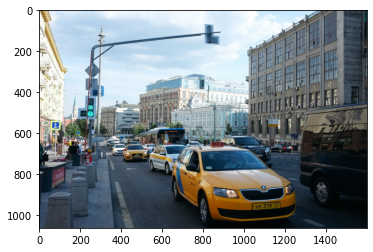

In [40]:
model6.predict(img_array)
print("im in ",class_names[np.argmax(model6.predict(img_array)[0])])


confidence = round(100 * (np.max(model6.predict(img_array)[0])), 2)
print('والله يبشا متاكد بالنسبة ',confidence)

plt. imshow(arr)

im in  moscow
والله يبشا متاكد بالنسبة  100.0


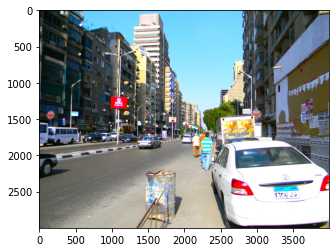

In [41]:
arr=plt.imread('../input/carioandpars/cairo1.jpg',0)
n = tf.image.resize(arr, (200,200))
img_array = tf.keras.preprocessing.image.img_to_array(n.numpy())
img_array = tf.expand_dims(img_array, 0)


model6.predict(img_array)
print("im in ",class_names[np.argmax(model6.predict(img_array)[0])])
confidence = round(100 * (np.max(model6.predict(img_array)[0])), 2)
print('والله يبشا متاكد بالنسبة ',confidence)

plt. imshow(arr)

im in  paris
والله يبشا متاكد بالنسبة  99.79


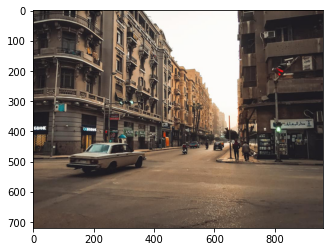

In [42]:
arr=plt.imread('../input/carioandpars/cairo2.jpg',0)
n = tf.image.resize(arr, (200,200))
img_array = tf.keras.preprocessing.image.img_to_array(n.numpy())
img_array = tf.expand_dims(img_array, 0)


model6.predict(img_array)
print("im in ",class_names[np.argmax(model6.predict(img_array)[0])])
confidence = round(100 * (np.max(model6.predict(img_array)[0])), 2)
print('والله يبشا متاكد بالنسبة ',confidence)

plt. imshow(arr)

We need a video of Cairo in the morning, not just at night

im in  paris
والله يبشا متاكد بالنسبة  100.0


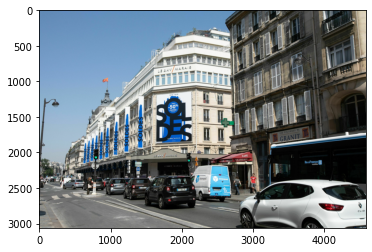

In [43]:
arr=plt.imread('../input/carioandpars/pai1.jpg',0)
n = tf.image.resize(arr, (200,200))
img_array = tf.keras.preprocessing.image.img_to_array(n.numpy())
img_array = tf.expand_dims(img_array, 0)


model6.predict(img_array)
print("im in ",class_names[np.argmax(model6.predict(img_array)[0])])
confidence = round(100 * (np.max(model6.predict(img_array)[0])), 2)
print('والله يبشا متاكد بالنسبة ',confidence)

plt. imshow(arr)

im in  paris
والله يبشا متاكد بالنسبة  99.22


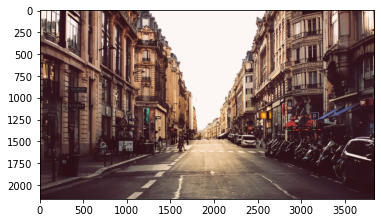

In [44]:
arr=plt.imread('../input/carioandpars/pai2.jpg',0)
n = tf.image.resize(arr, (200,200))
img_array = tf.keras.preprocessing.image.img_to_array(n.numpy())
img_array = tf.expand_dims(img_array, 0)


model6.predict(img_array)
print("im in ",class_names[np.argmax(model6.predict(img_array)[0])])
confidence = round(100 * (np.max(model6.predict(img_array)[0])), 2)
print('والله يبشا متاكد بالنسبة ',confidence)

plt. imshow(arr)